In [1]:
import tensorflow as tf

2023-12-14 01:33:14.793227: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-14 01:33:14.793276: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-14 01:33:14.794688: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-14 01:33:14.802756: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
gpu_devices = tf.config.list_physical_devices('GPU')
for device in gpu_devices:
    print(device)
    tf.config.experimental.set_memory_growth(device, True)

# with tf.device('/device:GPU:0'):
#     print('a')

2023-12-14 01:33:16.703607: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-12-14 01:33:16.703638: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: 8711d5d02ecf
2023-12-14 01:33:16.703647: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: 8711d5d02ecf
2023-12-14 01:33:16.703722: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 545.29.6
2023-12-14 01:33:16.703742: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 545.29.6
2023-12-14 01:33:16.703750: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:241] kernel version seems to match DSO: 545.29.6


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_theme(style="ticks")

In [4]:
df = pd.read_csv('winequality-red.csv').iloc[:, 1:].dropna(axis = 'index')
df

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   volatile acidity      1599 non-null   float64
 1   citric acid           1599 non-null   float64
 2   residual sugar        1599 non-null   float64
 3   chlorides             1599 non-null   float64
 4   free sulfur dioxide   1599 non-null   float64
 5   total sulfur dioxide  1599 non-null   float64
 6   density               1599 non-null   float64
 7   pH                    1599 non-null   float64
 8   sulphates             1599 non-null   float64
 9   alcohol               1599 non-null   float64
 10  quality               1599 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 137.5 KB


In [6]:
df.describe()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


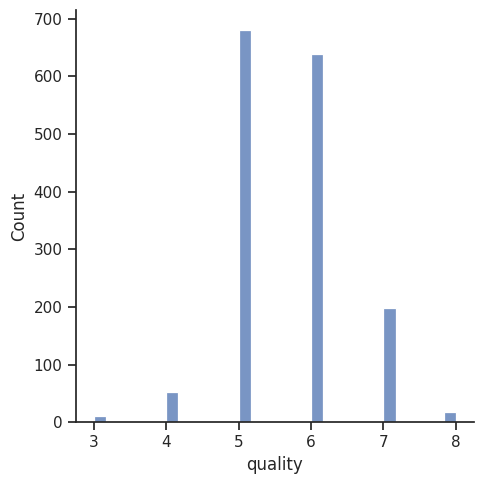

In [7]:
sns.displot(
    data = df, 
    x = 'quality'
)

In [8]:
# grouped_by_class = df.groupby('quality')

# # col ~ feature
# for feature in list(df.columns.drop('quality')):  # Начинаем со второго столбца, так как первый - это метка "class"
#     sns.displot(
#         data = df,
#         x = feature,
#         hue = 'quality'
#     )

<Axes: >

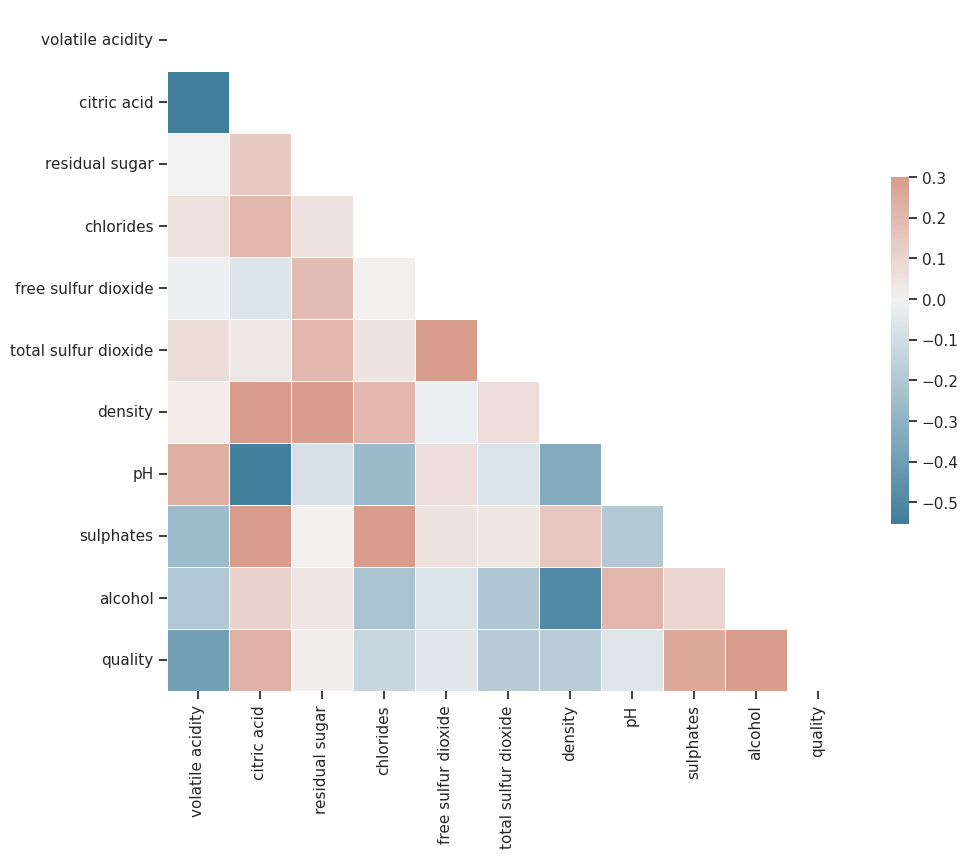

In [9]:
# source: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(['quality'], axis = 1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=666)

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [12]:
def rate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    r2 = r2_score(y_test, y_pred)

    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'R^2 Score: {r2}')
    

In [13]:
def diff_show(y_test, y_pred, limit=100500):
    y_test = list(y_test)
    y_pred = list(y_pred)
    print("pred  | test  |  diff (pred-test)")
    for i in range(min(len(y_pred), limit)):
        print(f'{y_pred[i]:.3f} | {y_test[i]:.3f} | {y_test[i]-y_pred[i]:.3f}')

## Task 1. Done =)

## Task 2

In [14]:
from keras.models import Sequential
from keras.layers import Dense
# from keras.losses import MeanSquaredError

model = Sequential()
model.add(Dense(24, input_dim=10, activation='relu'))
model.add(Dense(24, input_dim=10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=2)

y_pred = model.predict(X_test)

rate_model(y_test, y_pred)

2023-12-13 11:24:32.604312: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-13 11:24:32.604820: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-13 11:24:32.605226: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Epoch 1/40


2023-12-13 11:24:34.062585: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f2580c56990 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-13 11:24:34.062624: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-12-13 11:24:34.072433: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-13 11:24:34.095973: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
I0000 00:00:1702466674.189235   87212 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


43/43 - 2s - loss: 27.3663 - 2s/epoch - 40ms/step
Epoch 2/40
43/43 - 0s - loss: 4.4862 - 158ms/epoch - 4ms/step
Epoch 3/40
43/43 - 0s - loss: 2.1799 - 142ms/epoch - 3ms/step
Epoch 4/40
43/43 - 0s - loss: 1.3677 - 154ms/epoch - 4ms/step
Epoch 5/40
43/43 - 0s - loss: 1.0110 - 157ms/epoch - 4ms/step
Epoch 6/40
43/43 - 0s - loss: 0.7905 - 138ms/epoch - 3ms/step
Epoch 7/40
43/43 - 0s - loss: 0.6903 - 141ms/epoch - 3ms/step
Epoch 8/40
43/43 - 0s - loss: 0.6274 - 158ms/epoch - 4ms/step
Epoch 9/40
43/43 - 0s - loss: 0.5930 - 150ms/epoch - 3ms/step
Epoch 10/40
43/43 - 0s - loss: 0.5779 - 153ms/epoch - 4ms/step
Epoch 11/40
43/43 - 0s - loss: 0.5757 - 162ms/epoch - 4ms/step
Epoch 12/40
43/43 - 0s - loss: 0.5601 - 172ms/epoch - 4ms/step
Epoch 13/40
43/43 - 0s - loss: 0.5727 - 161ms/epoch - 4ms/step
Epoch 14/40
43/43 - 0s - loss: 0.5499 - 143ms/epoch - 3ms/step
Epoch 15/40
43/43 - 0s - loss: 0.5417 - 161ms/epoch - 4ms/step
Epoch 16/40
43/43 - 0s - loss: 0.5357 - 171ms/epoch - 4ms/step
Epoch 17/40
4

## Task 3

In [14]:
import optuna
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from sklearn.metrics import r2_score

optuna.logging.set_verbosity(optuna.logging.WARNING)

def create_model(trial):
    model = Sequential()
    activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid'])
    model.add(Dense(trial.suggest_int('neurons', 16, 128, step=8), input_dim=10, activation=activation))
    for i in range(trial.suggest_int('layers', 3, 5)):
        model.add(Dense(trial.suggest_int(f'neurons_{i}', 16, 128, step=8), activation=activation))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def objective(trial):
    model = create_model(trial)
    model.fit(X_train, y_train, epochs=trial.suggest_int('epochs', 32, 128, step=16), batch_size=trial.suggest_int('batch_size', 16, 48, step=16), verbose=0)

    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    return r2 

with tf.device('/device:GPU:0'):
    # study = optuna.create_study(direction='maximize')
    # study.optimize(objective, n_trials=200)
    
    # best_params = study.best_params
    # best_r2 = study.best_value
    # print(f"Best parameters: {best_params}")
    # print(f"Best R^2: {best_r2}")


8/8 [==============================] - 0s 2ms/step
Best parameters: {'activation': 'tanh', 'neurons': 24, 'layers': 4, 'neurons_0': 104, 'neurons_1': 56, 'neurons_2': 72, 'neurons_3': 32, 'epochs': 128, 'batch_size': 32}
Best R^2: 0.33539365596757686


Try1, 200 trials:
```
Best parameters: {'neurons': 48, 'layers': 4, 'neurons_0': 64, 'neurons_1': 40, 'neurons_2': 32, 'neurons_3': 48, 'optimizer': 'rmsprop', 'learning_rate': 2.71371130516847e-05, 'epochs': 64, 'batch_size': 16}
Best R^2: 0.3331035699850823
```

Try2, 200 trials, 5495 seconds =(:
```
Best parameters: {'activation': 'tanh', 'neurons': 24, 'layers': 4, 'neurons_0': 104, 'neurons_1': 56, 'neurons_2': 72, 'neurons_3': 32, 'epochs': 128, 'batch_size': 32}
Best R^2: 0.33539365596757686
```

## Task 4

In [14]:
#MSE

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=10, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=128, batch_size=32, verbose=2)

y_pred = model.predict(X_test)

Epoch 1/128
43/43 - 1s - loss: 6.9900 - 764ms/epoch - 18ms/step
Epoch 2/128
43/43 - 0s - loss: 0.6986 - 59ms/epoch - 1ms/step
Epoch 3/128
43/43 - 0s - loss: 0.6396 - 54ms/epoch - 1ms/step
Epoch 4/128
43/43 - 0s - loss: 0.6270 - 49ms/epoch - 1ms/step
Epoch 5/128
43/43 - 0s - loss: 0.6184 - 50ms/epoch - 1ms/step
Epoch 6/128
43/43 - 0s - loss: 0.6169 - 49ms/epoch - 1ms/step
Epoch 7/128
43/43 - 0s - loss: 0.6098 - 46ms/epoch - 1ms/step
Epoch 8/128
43/43 - 0s - loss: 0.6045 - 51ms/epoch - 1ms/step
Epoch 9/128
43/43 - 0s - loss: 0.5977 - 47ms/epoch - 1ms/step
Epoch 10/128
43/43 - 0s - loss: 0.5830 - 50ms/epoch - 1ms/step
Epoch 11/128
43/43 - 0s - loss: 0.5714 - 46ms/epoch - 1ms/step
Epoch 12/128
43/43 - 0s - loss: 0.5633 - 56ms/epoch - 1ms/step
Epoch 13/128
43/43 - 0s - loss: 0.5518 - 54ms/epoch - 1ms/step
Epoch 14/128
43/43 - 0s - loss: 0.5439 - 55ms/epoch - 1ms/step
Epoch 15/128
43/43 - 0s - loss: 0.5347 - 46ms/epoch - 1ms/step
Epoch 16/128
43/43 - 0s - loss: 0.5027 - 47ms/epoch - 1ms/step

In [15]:
rate_model(y_test, y_pred)

Mean Absolute Error: 0.5029011527697246
Mean Squared Error: 0.4153860575243016
Root Mean Squared Error: 0.6445045054336715
R^2 Score: 0.31686166875857213


In [22]:
#MAE

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(24, input_dim=10, activation='tanh'))
model.add(Dense(56, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_absolute_error', optimizer='adam')
model.fit(X_train, y_train, epochs=128, batch_size=32, verbose=2)

y_pred = model.predict(X_test)

Epoch 1/128
43/43 - 1s - loss: 2.3559 - 651ms/epoch - 15ms/step
Epoch 2/128
43/43 - 0s - loss: 0.6417 - 59ms/epoch - 1ms/step
Epoch 3/128
43/43 - 0s - loss: 0.6096 - 72ms/epoch - 2ms/step
Epoch 4/128
43/43 - 0s - loss: 0.5932 - 55ms/epoch - 1ms/step
Epoch 5/128
43/43 - 0s - loss: 0.5868 - 54ms/epoch - 1ms/step
Epoch 6/128
43/43 - 0s - loss: 0.5810 - 73ms/epoch - 2ms/step
Epoch 7/128
43/43 - 0s - loss: 0.5751 - 53ms/epoch - 1ms/step
Epoch 8/128
43/43 - 0s - loss: 0.5744 - 57ms/epoch - 1ms/step
Epoch 9/128
43/43 - 0s - loss: 0.5739 - 63ms/epoch - 1ms/step
Epoch 10/128
43/43 - 0s - loss: 0.5722 - 63ms/epoch - 1ms/step
Epoch 11/128
43/43 - 0s - loss: 0.5713 - 55ms/epoch - 1ms/step
Epoch 12/128
43/43 - 0s - loss: 0.5703 - 53ms/epoch - 1ms/step
Epoch 13/128
43/43 - 0s - loss: 0.5679 - 73ms/epoch - 2ms/step
Epoch 14/128
43/43 - 0s - loss: 0.5689 - 56ms/epoch - 1ms/step
Epoch 15/128
43/43 - 0s - loss: 0.5665 - 64ms/epoch - 1ms/step
Epoch 16/128
43/43 - 0s - loss: 0.5680 - 73ms/epoch - 2ms/step

In [23]:
rate_model(y_test, y_pred)

Mean Absolute Error: 0.5064082364241282
Mean Squared Error: 0.43401460403924924
Root Mean Squared Error: 0.6587978476279724
R^2 Score: 0.2862254113561913


## Task 5

In [18]:
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor(n_estimators=80, max_depth=4, learning_rate=0.19, random_state=666, subsample=0.9)
xgb_regressor.fit(X_train, y_train)

y_pred = xgb_regressor.predict(X_test)

rate_model(y_test, y_pred)
diff_show(y_test, y_pred, 10)

Mean Absolute Error: 0.44622016946474713
Mean Squared Error: 0.3386293568109399
Root Mean Squared Error: 0.5819186857379129
R^2 Score: 0.44309470784861416
pred  | test  |  diff (pred-test)
5.800 | 6.000 | 0.200
6.195 | 7.000 | 0.805
5.993 | 6.000 | 0.007
7.252 | 7.000 | -0.252
5.262 | 5.000 | -0.262
5.797 | 6.000 | 0.203
5.940 | 6.000 | 0.060
5.459 | 5.000 | -0.459
4.793 | 5.000 | 0.207
5.496 | 5.000 | -0.496
